pip install sklearn

In [1]:
from platform import python_version
python_version()

'3.10.6'

In [2]:
# import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # C-Support Vector Classification
from sklearn.neighbors import KNeighborsClassifier # Classifier implement k-nearest neighbores vote
from sklearn.metrics import accuracy_score

In [3]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
len(iris)

150

In [7]:
iris.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [8]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris = pd.read_csv('Iris.csv', index_col = 'Id')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [16]:
iris.shape

(150, 5)

In [17]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
# split input data/independent features/predictors and output data/dependent features/labels

X = iris.drop('Species', axis = 1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [19]:
y = iris['Species']
y.head()

Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

In [21]:
# split full data to train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [22]:
svc = SVC() # crate a model
svc.fit(X_train, y_train) # train the model
y_pred = svc.predict(X_test) # predict the model
accuracy_score(y_test, y_pred) # check the score 


1.0

In [23]:
# find the most important feature
from sklearn.inspection import permutation_importance

In [24]:
perm_importance = permutation_importance(svc, X_test, y_test)

In [25]:
perm_importance.importances_mean

array([0.00666667, 0.01333333, 0.64      , 0.15333333])

In [26]:
sorted_idx = perm_importance.importances_mean.argsort() # sort the most important one

In [27]:
sorted_idx

array([0, 1, 3, 2])

In [28]:
# create a dataframe to do a visualize

df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns = ['Value'])
df.head()

,Value
SepalLengthCm,0.006667
SepalWidthCm,0.013333
PetalWidthCm,0.153333
PetalLengthCm,0.640000


<AxesSubplot: >

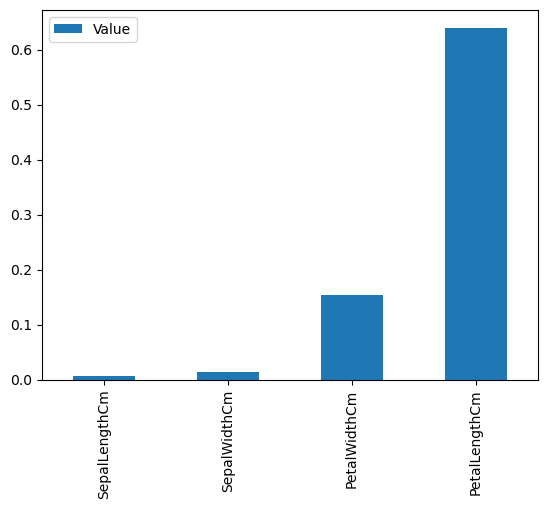

In [29]:
df.plot.bar()

<AxesSubplot: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

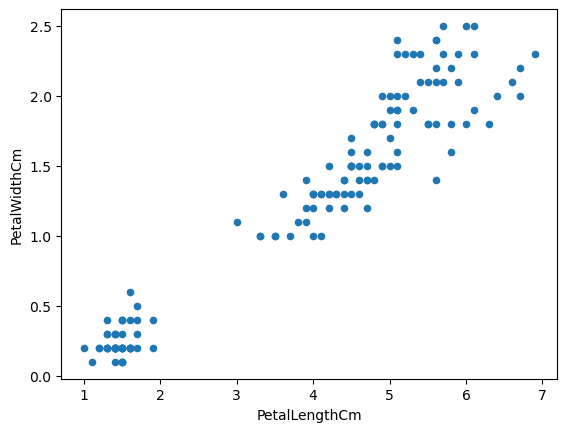

In [30]:
iris.plot.scatter(x = 'PetalLengthCm', y = 'PetalWidthCm')

In [31]:
color_map = {'Iris-setosa': 'b', 'Iris-versicolor': 'r', 'Iris-virginica': 'y'} # use dictionary and take the names
colors = iris['Species'].apply(lambda x: color_map[x]) # make a serie to take data and take this species, dp apply, do lambda fn 

In [32]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

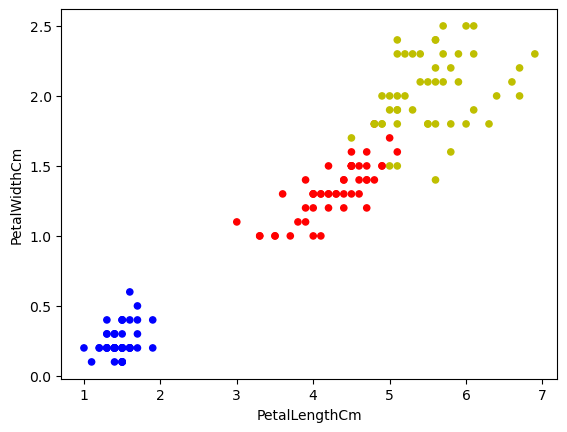

In [33]:
iris.plot.scatter(x = 'PetalLengthCm', y = 'PetalWidthCm', c = colors)

In [34]:
# use KNeighborsClassifier model

kn = KNeighborsClassifier() # create a model
kn.fit(X_train, y_train) # train a model
y_pred = kn.predict(X_test) # predict a model
accuracy_score(y_test, y_pred) # check accuracy

1.0

In [35]:
perm_importance = permutation_importance(kn, X_test, y_test)

In [36]:
perm_importance.importances_mean

array([0.01333333, 0.        , 0.65333333, 0.2       ])

In [37]:
sorted_idx = perm_importance.importances_mean.argsort() # sort of which one is the most important
sorted_idx

array([1, 0, 3, 2])

In [38]:
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.head()

,Value
SepalWidthCm,0.000000
SepalLengthCm,0.013333
PetalWidthCm,0.200000
PetalLengthCm,0.653333


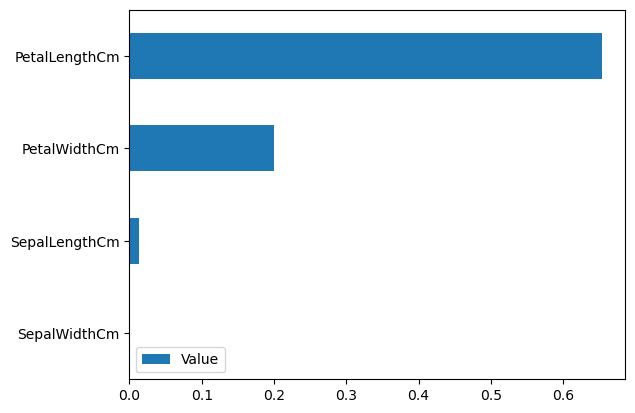

In [39]:
df.plot.barh();